# Section 6

### ICA
Independent Component Analysis transform a set of vectors into maximally independent set.

Cocktail Party problem (ICA most famous problem):
Assume we have n=2 speakers are talking into n=2 mics
* Input data: is the recorded data from the two mics
* Objective: is to get the the data of the two speakers (vector of Speaker 1 and Speaker 2)

ICA employs a very simple model: $X = AS$ where $X$ is our observations "here is the data from the mic", $A$ is the mixing matrix and $S$ is the vector of independent sources "data of speakers".

$$S^i_j$$ speaker j at time i
$$X^{(i)}_n=AS^{(i)}$$
where i is the time, n is the number of the mixture(mic)


i.e:
let's drop the time now
* data of the first mic is the summation of the data comming from the two speakers (sources) recorded by mic 1
$$x_1=a_1s_1+a_2s_2$$



* data at the second mic is the summation of the data comming from the two speakers (sources) recorded by mic 2
$$x_2=a_3s_1+a_4s_2$$

The challenge is to recover $A$ and $S$ from $X$.
or We can say that: $S = WX$, as $W$ is the unmixing matrix, as we need to get $W$ and get $S$, so this must be done but with several assumptions:
1. The sources are statistically independent.
2. They must have non gaussian distribution.

For two independent components that have continous uniform distribution so there distribution will be something like the following figure
<img src="PDF_Of_sources.png">


Since the two variables (sources/speakers in our example) are independent variables so their joint probability(probability of two speakers at a time) is:
$$P(S)=P_s(s_1)P_s(s_2)$$


<img src="Joint_distribution_ofSources.png">
The joint distribution of the independent components $s_1$ and $s_2$ with uniform distributions,
Horizontal axis: $s_1$, vertical axis $s_2$

<img src="JointDistributionOftheMixtures.png">
The joint distribution of the observed mixtures $x_1$ and $x_2$ Horizontal axis $x_1$ vertical axis $x_2$

Since $$X=AS$$
Since $$S=WX$$
then $$P(X)=\prod_{j=1}^{n}P_s(w^T_jx)|w|$$
$P_S$ probability of the two speakers at a time

In [12]:
from sklearn.decomposition import FastICA
from pylab import *
from skimage import data, io, color

(529, 782)


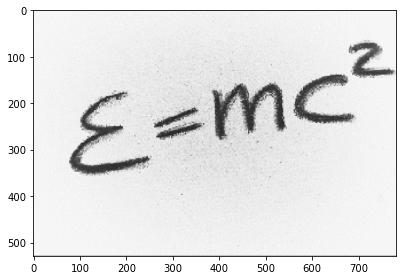

In [13]:
emc2_image = io.imread("emcsquared.png", as_gray = True)
print(emc2_image.shape)
io.imshow(emc2_image)
show()

Now, we choose a number of components we want say 10, and use that number to create Independent component analysis. In the example below, we’ll create a FastICA object with 10 components. This will allow us to run ICA on our image, resulting in 10 independent components.

In [14]:
ica = FastICA(n_components = 10)
# run ICA on image
ica.fit(emc2_image)

FastICA(n_components=10)

An important test when doing any type of dimensionality reduction to test how much information has been lost. In our example, we will reconstruct the image with the independent components (how does the image look if we only know the 10 independent components we’ve developed)

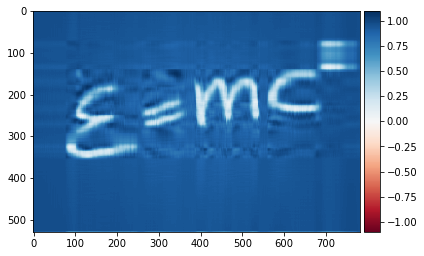

In [15]:
# reconstruct image with independent components
emc2_image_ica = ica.fit_transform(emc2_image)
emc2_restored = ica.inverse_transform(emc2_image_ica)
 
# show image to screen
io.imshow(emc2_restored)
show()

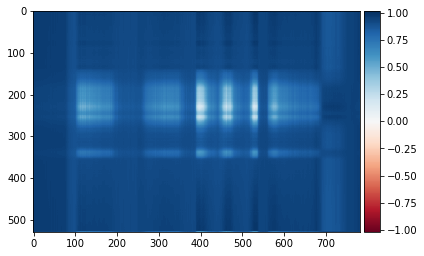

In [16]:
ica = FastICA(n_components = 1)
# run ICA on image
ica.fit(emc2_image)
emc2_image_ica_1 = ica.fit_transform(emc2_image)
emc2_restored_1 = ica.inverse_transform(emc2_image_ica_1)
 
# show image to screen
io.imshow(emc2_restored_1)
show()

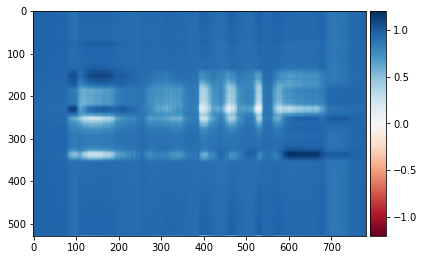

In [17]:
ica = FastICA(n_components = 2)
# run ICA on image
ica.fit(emc2_image)
emc2_image_ica_2 = ica.fit_transform(emc2_image)
emc2_restored_2 = ica.inverse_transform(emc2_image_ica_2)
 
# show image to screen
io.imshow(emc2_restored_2)
show()

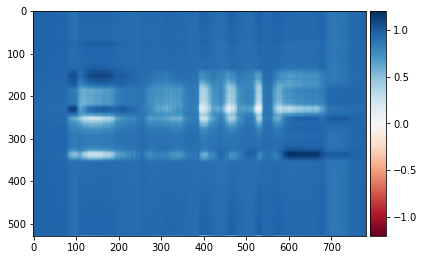

C:\Users\hp\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


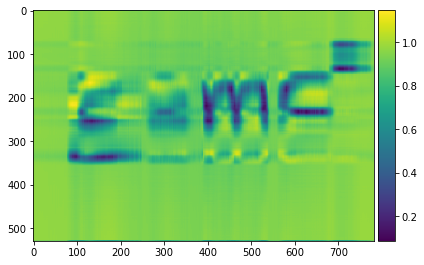

C:\Users\hp\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


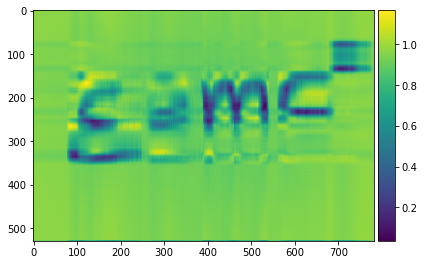

C:\Users\hp\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


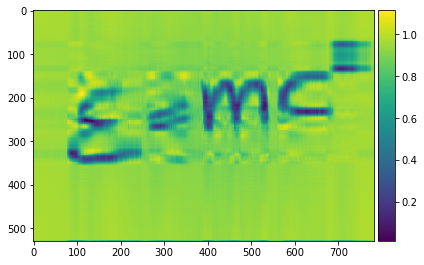

C:\Users\hp\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


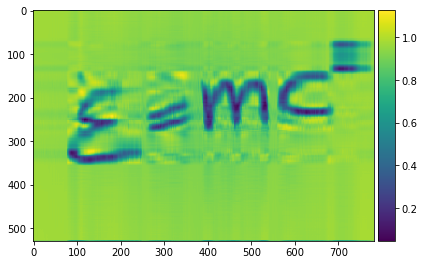

C:\Users\hp\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


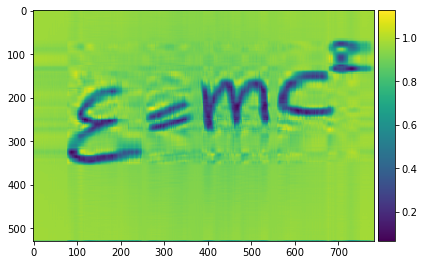

In [18]:
components =[2,5,6,8,9,12]
for component in components:
    ica = FastICA(n_components = component)
    # run ICA on image
    ica.fit(emc2_image)
    emc2_image_ica_com = ica.fit_transform(emc2_image)
    emc2_restored_com = ica.inverse_transform(emc2_image_ica_com)
    # show image to screen
    io.imshow(emc2_restored_com)
    show()

#### Example 2

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA

np.random.seed(0)  # set seed for reproducible results
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: sawtooth signal

S = np.c_[s1, s2, s3]
print('s1',s1)
print('s2',s2)
print('s3',s3)

s1 [ 0.          0.00800392  0.01600732 ... -0.27253687 -0.28022907
 -0.28790332]
s2 [ 0.  1.  1. ... -1. -1. -1.]
s3 [-1.       -0.991996 -0.983992 ...  0.983992  0.991996 -1.      ]


In [22]:
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

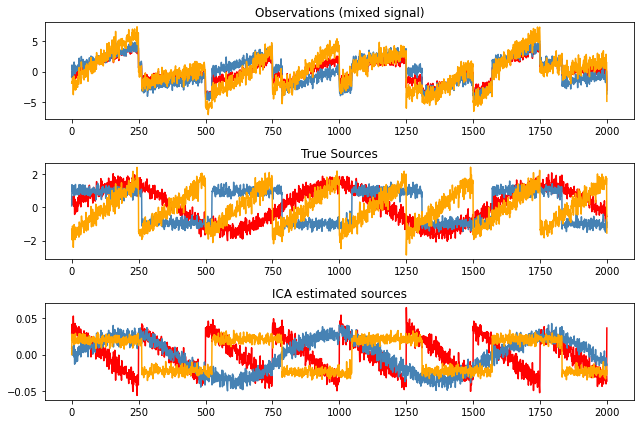

In [21]:
# compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Get the estimated sources

plt.figure(figsize=(9, 6))

models = [X, S, S_]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA estimated sources']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()